# Exercises

## 1 – Managing text and filtering

Using the following words:

**[" further ", " Forward ", " Foreign ", " financE ", " Forgive ", " feature ", " federal ",
" failurE ", " Feeling ", " finding ", " freedom ", " Foundry "]**

In [106]:
words_array=["further", "Forward", "Foreign", "financE", "Forgive", "feature", "federal", "failurE", "Feeling", "finding", "freedom", "Foundry"]

**(a) Print all words beginning with *fo***

In [107]:
cleaned_words_array=map(lambda word: word.lower(), words_array)

for word in cleaned_words_array:
    if word.startswith("fo"):
        print(word)

forward
foreign
forgive
foundry


**(b) Print all words ending with *e***

In [108]:
cleaned_words_array=map(lambda word: word.lower(), words_array)

for word in cleaned_words_array:
    if word.endswith("e"):
        print(word)

finance
forgive
feature
failure


**(c) Reflect on how simple techniques like these can bring value to a project**

Basic filtering, and text cleaning techniques are important when a project needs to analyse text to extract value from them. Working with only lowercase text, removing stopwords and punctuation marks, leaves words that add more value when they finally are analyzed.

**(d) Converting words to lowercase is a frequent process in text cleaning. Can you think of any issues
that arise by doing this?**

An issue that can arise, is if the word isn't uppercase because it starts a new sentence, but beacuse it has a special meaning. That word would loose it's meaning when it's converted to lowercase. In addition, in case a word being in uppercase can be usefull to distinguish a different sentence, that clue would be gone.

## 2 – Reading a corpus

In NLTK, several corpora are available.
Load the Brown corpus and extract data (i.e. words) from at least two categories of your choice (or all). The goal is to find basic trends or identifiers for each category (i.e. spotting differences in the data). Do the following:

**(a) Look at the top 5 most common words. Do you notice any similarities? Explain your findings**

In [109]:
import nltk

In [110]:
from nltk.corpus import brown

religion_text = brown.words(categories='religion')
fdist = nltk.FreqDist(word.lower() for word in religion_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("Religion text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1
    

news_text = brown.words(categories='news')
fdist = nltk.FreqDist(word.lower() for word in news_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("\nNews text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1


Religion text:
1 - the 2480 occurrences
2 - of 1505 occurrences
3 - and 962 occurrences
4 - to 904 occurrences
5 - in 774 occurrences

News text:
1 - the 6386 occurrences
2 - of 2861 occurrences
3 - and 2186 occurrences
4 - to 2144 occurrences
5 - a 2130 occurrences


Analyzing the results of the top 5 common words between the religious' texts vs the news' texts in the Brown corpus, shows that all the top 5 common words in both are stopwords. This makes sense, since stopwords are frequently used in languages, and there is a specific amount of stopwords being used in English.

**(b) Filter stopwords and repeat (a). Describe at least two new techniques you would use to further
improve the result**

In [111]:
from nltk.corpus import brown, stopwords

stop_words = set(stopwords.words('english'))

religion_text = brown.words(categories='religion')
filtered_religion_text = [word for word in religion_text if not word.lower() in stop_words]

fdist = nltk.FreqDist(word.lower() for word in filtered_religion_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("Religion text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1
    

news_text = brown.words(categories='news')
filtered_news_text = [word for word in news_text if not word.lower() in stop_words]

fdist = nltk.FreqDist(word.lower() for word in filtered_news_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("\nNews text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1

Religion text:
1 - god 136 occurrences
2 - one 104 occurrences
3 - new 99 occurrences
4 - world 94 occurrences
5 - church 94 occurrences

News text:
1 - said 406 occurrences
2 - would 246 occurrences
3 - new 241 occurrences
4 - one 213 occurrences
5 - last 177 occurrences


Other techniques I would use to improve the results are:
- Stemming: grouping words by their word stem.
- Lemmatization: simplifying words, but by taking into account their meaning.

**(c) Implement at least one technique of your choice and repeat (a)**

Implementing stemming with nltk Porter stemmer algorithm:

In [112]:
from nltk.stem.porter import PorterStemmer

stemmed_rel_text = map(lambda word: PorterStemmer().stem(word), filtered_religion_text)

fdist = nltk.FreqDist(word.lower() for word in stemmed_rel_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("Religion text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1
    
stemmed_news_text = map(lambda word: PorterStemmer().stem(word), filtered_news_text)

fdist = nltk.FreqDist(word.lower() for word in stemmed_news_text if word.isalnum())
five_most_common = fdist.most_common(5)
i=1
print("\nNews text:")
for word, count in five_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1

Religion text:
1 - god 138 occurrences
2 - church 127 occurrences
3 - one 110 occurrences
4 - new 99 occurrences
5 - world 95 occurrences

News text:
1 - said 406 occurrences
2 - would 246 occurrences
3 - year 244 occurrences
4 - new 242 occurrences
5 - one 221 occurrences


For religious' texts, "church" climbed up the common words list 94 occurrences before stemming to 127. 
In news' texts "year" appeares in the list with 244 occurrences.

**(d) Plot a feature you find interesting (e.g. lexical diversity). NLTK has several built-in methods for
plotting (make sure you have Matplotlib installed!)**

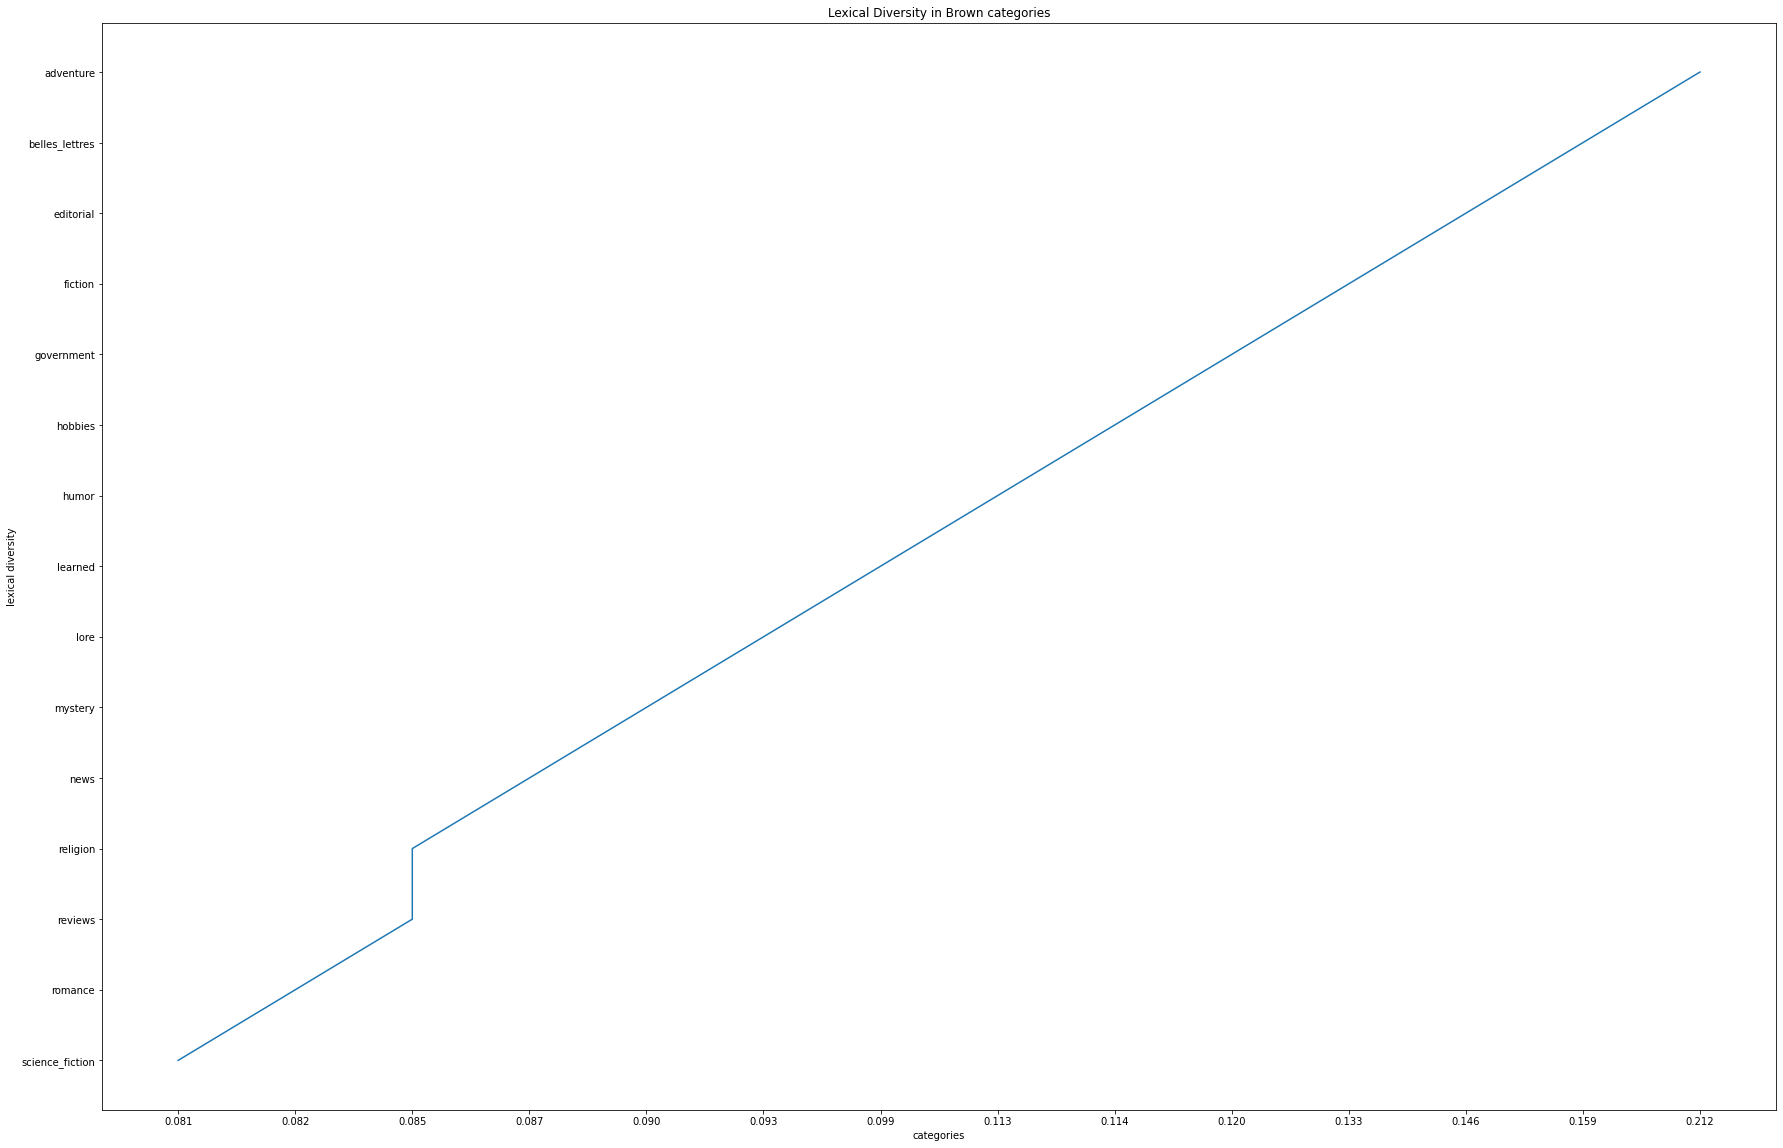

In [285]:
from nltk.corpus import brown
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))

def get_lexical_diversity_brown_texts():
    filtered_text=[]
    lexical_diversity_per_category=[]
    for category in brown.categories():
        for word in brown.words(categories=category):
            if not word.lower() in stop_words:
                filtered_text.append(word)
        lexical_diversity_per_category.append([category, '{:.3f}'.format(len(set(filtered_text))/len(filtered_text))])
    return lexical_diversity_per_category

brown_avg_vocab_per_category=get_lexical_diversity_brown_texts()

categories=[]
avgs =[]
for cat, avg in brown_avg_vocab_per_category:
    categories.append(cat)
    avgs.append(avg)

avgs.reverse()
categories.reverse()

plt.plot(avgs,categories)
plt.title('Lexical Diversity in Brown categories')
plt.xlabel('categories')
plt.ylabel('lexical diversity')

plt.show()
        



In this figure the lexical diversity of all the categories in the Brown corpus can be seen.
The lexical diversity ratio tells us how many distinct words there are in a text, where a higher score signifies a higher diversity.

About how to calculate lexical diversity: https://uio-ccse.github.io/algoritmisk-tenkning-humanister/02_computational_linguistics/W2_Lecture.html

## 3 - Building your own corpus


A real-world project needs updated data. Not all services provide proper APIs to access their data,
and must thus be mined. In this task, you need to build a web scraper for your favorite news site,
separating each article. Norwegian sites can also be used, you can find a list of stopwords here: https:
//gist.github.com/kmelve/8869818.
The following data should be extracted:
1. Headline
2. Ingress
3. Several sentences from the text body
4. Published date
5. Topic, if it is easily accessible. Several news sites allow you to browse news by category.
6. URL
Try to use at least 50 articles for somewhat interesting results. However, feel free to create your own huge
dataset for future use! The data may be saved in any format of your choice (e.g., .txt, .json), as long as
you are able to load the content into a Python program. If you managed to separate on topics, feel free
to do the tasks d-f below separately for each topic (easy once you have the code for one)


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get('https://arstechnica.com')
content = driver.page_source
soup = BeautifulSoup(content, features="html.parser")
tabs = soup.find_all('li')

driver.quit()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\phajs\.wdm\drivers\chromedriver\win32\97.0.4692.71]
C:\Users\phajs\AppData\Local\Temp\ipykernel_9788\1172099546.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [126]:
topics = []
for tab in tabs[:6]:
    topics.append(tab.find('a')['href'])

print(topics)

['/information-technology/', '/gadgets/', '/science/', '/tech-policy/', '/cars/', '/gaming/']


Find news in information technology

In [184]:
import json

def ArticleContent(url):
    driver = webdriver.Chrome(ChromeDriverManager().install())
    driver.get(url)
    content = driver.page_source
    driver.quit()
    parsed_article = BeautifulSoup(content, features="html.parser")
    article_content = parsed_article.find('div', class_="article-content").find_all('p')[:2]
    content = ""
    for el in article_content:
        content = content + el.get_text()
    return content

def ArticleScraper(parsed_content):
    json_list=[]
    main = parsed_content.find("main")
    articles = main.find('ol').find_all('li')
    topic = parsed_content.find('title').string.split('|')[0]
    for li in articles:
        header = li.h2.get_text()
        ingress = li.find('p', class_='excerpt').get_text()
        published = li.find('p', class_='byline').time.string.split(',')[0]
        url = li.h2.a.attrs['href']
        article_text = ArticleContent(url)
        article_object = {
            "header": header,
            "ingress": ingress,
            "published": published,
            "topic": topic,
            "body": article_text,
            "url": url
            }
        json_article = json.dumps(article_object)
        json_list.append(json_article)
    return json_list

def main():
    json_list=[]
    for topic in topics:
        driver = webdriver.Chrome(ChromeDriverManager().install())
        ars_technica = 'https://arstechnica.com'+topic
        driver.get(ars_technica)
        content = driver.page_source
        parsed_content = BeautifulSoup(content, features="html.parser")
        json_list.extend(ArticleScraper(parsed_content))
        driver.quit()
    return json_list

In [ ]:
articles = main()

In [213]:
with open('ars_technica.txt', 'w') as f:
    for element in articles:
        f.write(element+"\n")

Try to use at least 50 articles for somewhat interesting results. However, feel free to create your own huge dataset for future use! The data may be saved in any format of your choice (e.g., .txt, .json), as long as you are able to load the content into a Python program. If you managed to separate on topics, feel free to do the tasks d-f below separately for each topic (easy once you have the code for one)

**(a) Build the corpus. Chapter 2, section 1.9 (NLTK) and Chapter 2 (ATAP) explain of how this can be
done using NLTK (e.g., using a custom HTMLCorpusReader), but you are free to load the text as
you prefer. As long as the code is readable!**

In [225]:
import nltk.data
nltk.download('punkt')
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

new_corpus = PlaintextCorpusReader('.', 'ars_technica.txt')

print(new_corpus.sents())

[['{"', 'header', '":', '"', 'New', '\\', 'u201cStarlink', 'Premium', '\\', 'u201d', 'costs', '$', '500', '/', 'month', ',', 'ships', 'sooner', 'than', 'standard', 'Starlink', '",', '"', 'ingress', '":', '"', 'Starlink', 'Premium', 'ships', 'in', 'Q2', ',', '\\"', 'has', 'more', 'than', 'double', 'the', 'antenna', 'capability', '.\\"",', '"', 'published', '":', '"', '2', '/', '2', '/', '2022', '",', '"', 'topic', '":', '"', 'Biz', '&', 'IT', '",', '"', 'body', '":', '"', 'Starlink', 'has', 'started', 'taking', 'orders', 'for', 'a', 'premium', 'service', 'with', 'a', 'bigger', 'antenna', 'that', 'delivers', 'download', 'speeds', 'of', 'up', 'to', '500Mbps', ',', 'and', 'it', 'costs', 'five', 'times', 'as', 'much', 'as', 'the', 'standard', 'service', ':', '$', '2', ',', '500', 'for', 'the', 'hardware', 'and', '$', '500', 'per', 'month', 'for', 'Internet', 'access', '.\\"', 'Starlink', 'Premium', 'has', 'more', 'than', 'double', 'the', 'antenna', 'capability', 'of', 'Starlink', ',\\"', 't

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phajs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**(b) Clean the data using what you have just learned. There are likely several new problems to handle.
Select one and explain how you would solve it – no need for code**

In [236]:
stop_words = set(stopwords.words('english'))

filter_corpus = [word for word in new_corpus.words() if not word.lower() in stop_words]

print(filter_corpus[:100])

['{"', 'header', '":', '"', 'New', '\\', 'u201cStarlink', 'Premium', '\\', 'u201d', 'costs', '$', '500', '/', 'month', ',', 'ships', 'sooner', 'standard', 'Starlink', '",', '"', 'ingress', '":', '"', 'Starlink', 'Premium', 'ships', 'Q2', ',', '\\"', 'double', 'antenna', 'capability', '.\\"",', '"', 'published', '":', '"', '2', '/', '2', '/', '2022', '",', '"', 'topic', '":', '"', 'Biz', '&', '",', '"', 'body', '":', '"', 'Starlink', 'started', 'taking', 'orders', 'premium', 'service', 'bigger', 'antenna', 'delivers', 'download', 'speeds', '500Mbps', ',', 'costs', 'five', 'times', 'much', 'standard', 'service', ':', '$', '2', ',', '500', 'hardware', '$', '500', 'per', 'month', 'Internet', 'access', '.\\"', 'Starlink', 'Premium', 'double', 'antenna', 'capability', 'Starlink', ',\\"', 'product', "'", 'website', 'says', '.']


Additionally, the corpus has many backspaces and unicode characters that I would filter out using regex.

**(c) Separate the text body (sentences) into tokens (words) by splitting on spaces. Find and implement
one improvement on this tokenization process**

In [269]:
filter_corpus = [word for word in filter_corpus if word.isalnum()]

The filtered corpus in the variable filter_corpus is already split into tokens. The corpus is improved by filtering all characters that are not alpha numeric.

**(d) Print the 10 most common words**

In [271]:
key_words = ["header", "ingress", "body", "sentences", "published", "date", "topic", "url"]
fdist = nltk.FreqDist(word.lower() for word in filter_corpus if word not in key_words and word.isalpha())
ten_most_common = fdist.most_common(10)
i=1
print("Ten most common words:")
for word, count in ten_most_common:
    print(i,'-', word, count, 'occurrences')
    i+=1

Ten most common words:
1 - com 37 occurrences
2 - https 36 occurrences
3 - arstechnica 36 occurrences
4 - new 29 occurrences
5 - google 28 occurrences
6 - science 24 occurrences
7 - like 16 occurrences
8 - users 15 occurrences
9 - tech 15 occurrences
10 - pi 14 occurrences


**(e) Create bigrams from the texts that do not contain stopwords. Print the 10 most common bigrams**

In [279]:
from collections import Counter
bigram = nltk.bigrams(filter_corpus)

#Function taken from https://www.programcreek.com/python/example/16275/nltk.FreqDist
def bigram_counts(word_list):
	bgs = nltk.bigrams(word_list)
	fdist = nltk.FreqDist(bgs)
	d = Counter()
	for k, v in fdist.items():
		d[k] = v
	return d 

for element in bigram_counts(bigram).most_common(10):
    print(element)


((('url', 'https'), ('https', 'arstechnica')), 36)
((('https', 'arstechnica'), ('arstechnica', 'com')), 36)
((('arstechnica', 'com'), ('com', 'gadgets')), 13)
((('com', 'gadgets'), ('gadgets', '2022')), 13)
((('2022', 'topic'), ('topic', 'Biz')), 12)
((('topic', 'Biz'), ('Biz', 'body')), 12)
((('2022', 'topic'), ('topic', 'Tech')), 12)
((('topic', 'Tech'), ('Tech', 'body')), 12)
((('2022', 'topic'), ('topic', 'Science')), 12)
((('topic', 'Science'), ('Science', 'body')), 12)


**(f) Find the headline that contains the highest number of most frequently used words (from the common
words in task d, but not limited to top 10). If you want to, you are free to explore more advanced
techniques if desired, e.g., generating a new headline based on the frequency of words, etc.**

I struggled with finding a method that finds the json keywords in the corpus, so I could not finish this last task.